In [10]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import transforms, datasets

In [11]:
class Network(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = torch.nn.Dropout2d()
        self.fc1 = torch.nn.Linear(320, 50)
        self.fc2 = torch.nn.Linear(50, 10)

    def forward(self, x):
        # 28 X 28 --> 24 X 24(by convolution) --> 12 X 12 (by max_pool2d)
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        # 12 X 12 --> 8 X 8(by convolution) --> 4 X 4 (by max_pool2d)
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        # 4 X 4 X 20 == 320
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)
    
        
def fit(epoch, model, data_loader, phase='training', volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
        volatile=True
    
    running_loss = 0.0
    running_correct = 0
    
    for batch_idx, (data, target) in enumerate(data_loader):
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        
        if phase == 'training':
            optimizer.zero_grad()
        
        output = model(data)
        loss = torch.nn.functional.nll_loss(output, target)
        
        running_loss += torch.nn.functional.nll_loss(output, target, reduction='none').data[0]
        preds = output.data.max(dim=1, keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        
        if phase == 'training':
            loss.backward()
            optimizer.step()
        
    loss = running_loss / len(data_loader.dataset)
    accuracy = 100. * running_correct / len(data_loader.dataset)
        
    print(f'{phase} loss is {loss:5.2f} and {phase} accuracy is {running_correct} / {len(data_loader.dataset)} {accuracy:10.4f}')
    return loss, accuracy

E:\Users\dbsrh\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


training loss is  0.02 and training accuracy is 46476 / 60000    77.4600
validation loss is  0.00 and validation accuracy is 9575 / 10000    95.7500
training loss is  0.01 and training accuracy is 54351 / 60000    90.5850
validation loss is  0.00 and validation accuracy is 9692 / 10000    96.9200
training loss is  0.01 and training accuracy is 55509 / 60000    92.5150
validation loss is  0.00 and validation accuracy is 9772 / 10000    97.7200
training loss is  0.01 and training accuracy is 56096 / 60000    93.4933
validation loss is  0.00 and validation accuracy is 9794 / 10000    97.9400
training loss is  0.01 and training accuracy is 56519 / 60000    94.1983
validation loss is  0.00 and validation accuracy is 9818 / 10000    98.1800
training loss is  0.01 and training accuracy is 56711 / 60000    94.5183
validation loss is  0.00 and validation accuracy is 9839 / 10000    98.3900
training loss is  0.01 and training accuracy is 56924 / 60000    94.8733
validation loss is  0.00 and vali

E:\Users\dbsrh\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Users\dbsrh\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Users\dbsrh\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Users\dbsrh\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Users\dbsrh\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Users\dbsrh\Anaconda3\envs\pytorch\lib\site-packages\matp

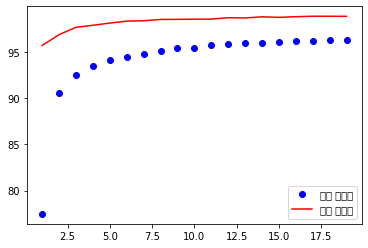

In [14]:
transformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307, ), (0.3081, ))
])

train_dataset = datasets.MNIST('data/', train=True, transform=transformation, download=True)
test_dataset = datasets.MNIST('data/', train=False, transform=transformation, download=True)
    
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=True)

model = Network()
if torch.cuda.is_available():
    model.cuda()
    
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
train_losses, train_accuracy = [], []
val_losses, val_accuracy = [], []
for epoch in range(1, 20):
    epoch_loss, epoch_accuracy = fit(epoch, model, train_loader, phase='training')
    val_epoch_loss, val_epoch_accuracy = fit(epoch, model, test_loader, phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)
    
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, 'bo', label = '학습 정확도')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, 'r', label = '검증 정확도')

plt.legend()

SyntaxError: can't use starred expression here (<ipython-input-2-0b18e8b7a1ca>, line 4)